<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Ответ:

Для воспроизводимости результатов между итерациями

Под капотом у компьютеров используется псевдогенератор случайных чисел (последовательности выдаваемых чисел уже созданы), соответственно, фиксируя random_seed мы фиксируем состояние нашего рандомайзера.

Особенно актуально для сплитов данных и настройки тюнеров


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv(
    "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv"
)
df_test = pd.read_csv(
    "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv"
)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [x] Отобразите 30 случайных строк тренировочного датасета.
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [x] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [x] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Если отсортировать по какой-либо переменной (например по цене), то можно посмотреть экземпляры соответствующие минимальным и максимальным значений

- [x] Достаточно ли метода duplicated для анализа дубликатов? Почему?


**0.15 балла**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
# 30 случайных
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
# Первые 5
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [6]:
# Последние 5
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
# Ч. Пропуски и дубликаты
pd.set_option("display.max_columns", 100)
# Проверка на пропуски
print("Количество пропусков по столбцам:")
print(df_train.isna().sum()[df_train.isna().sum() > 0])

Количество пропусков по столбцам:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


In [8]:
print("\nКоличество дубликатов:")
print(df_train.duplicated().sum())


Количество дубликатов:
985


In [9]:
# Посмотрим на полные дубликаты
df_train[df_train.duplicated()].sort_values(by=["name"], ascending=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1468,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
962,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0


## Вопросы
###  Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Если отсортировать по какой-либо переменной (например по цене), то можно посмотреть экземпляры соответствующие минимальным и максимальным значений
### Достаточно ли метода duplicated для анализа дубликатов? Почему?

Не совсем, так как он оставляет только первое вхождение. Обычно нужно комбинировать вместе с другими техниками:

- Для подсчета количества дублей
- Поиск неполных дубликатов, когда есть "нестрогое" соответствие текстовых полей


In [10]:
# Группируем дубликаты для анализа (cхлопываем до одной позиции с подсчетом количества вхождений)
duplicates = df_train[df_train.duplicated(keep=False)]
grouped_duplicates = duplicates.groupby(list(df_train.columns)).size().reset_index()
print("Сгруппированные дубликаты:")
grouped_duplicates

Сгруппированные дубликаты:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,0
0,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
1,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
2,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
3,BMW 3 Series 320d Luxury Line,2012,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
4,BMW 3 Series 320d Luxury Line Plus,2017,2600000,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,Manual,First Owner,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0,2
477,Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,650000,40000,Diesel,Dealer,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0,2
478,Volkswagen Vento 1.5 TDI Highline AT,2016,1000000,60000,Diesel,Individual,Automatic,First Owner,22.15 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0,2
479,Volvo V40 D3 R-Design,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0,23


In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

# Всё работает, просто закоментил, потому что слишком большой вывод
# display(profile)

## Выводы по датасету

### Общие выводы

- Общий объем данных на трейне - 6999, на тесте - 1000
- Датасет представляет из себя данные по продажам по машина и их стоимости.
- Внутри датасета присутствуют полные дубликаты, которые могли появится вследствие дедубликации 123

### Пропуски

| Столбец   | Кол-во пропусков |
|-----------|------------------|
| mileage   | 202              |
| engine    | 202              |
| max_power | 196              | 
| torque    | 203              | 
| seats     | 202              |


### Дубли

В объявлениях встречаются полные дубликаты. Причем их количество варьируется от пары, до 30 штук для отдельных позиций машин


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
# Зададим числовые и другие столбцы
num_features = list(
    df_train.select_dtypes(exclude=["object", "bool", "datetime64[ns]"]).columns
)
cat_features = list(df_train.select_dtypes(include=["object", "bool"]).columns)

num_features.remove("selling_price")

print("Числовые столбцы:", num_features)
print("Категориальные столбцы:", cat_features)

Числовые столбцы: ['year', 'km_driven', 'seats']
Категориальные столбцы: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [13]:
from typing import Union, Optional
from sklearn.base import TransformerMixin

df_columns = list(df_train.columns)

from sklearn import set_config

set_config(transform_output="pandas")


# Комментарий, я сгорел на том, что комбинация ColumnTransformer & SimpleImputer дропает название фичей и меняет их местами...
# Поэтому написал свой statefull Transformer на базе Mixin из sklearn
class MyStateFullFillerTransformer(TransformerMixin):
    def __init__(
        self,
        strategy: str,
        cols: set[str],
    ) -> None:
        self.strategy = strategy
        self.cols = set(cols)
        self.state: dict[str, Union[float, int]] = {}

    def fit(
        self, X: pd.DataFrame, y=None, cols: Optional[list[str]] = None
    ) -> "MyStateFullFillerTransformer":
        if cols:
            self.cols = self.cols | set(cols)

        for col in self.cols:
            # если для колонки уже посчитано состояние (мы обновляем наш трансформер)
            if col in self.state:
                continue

            if self.strategy == "mean":
                self.state[col] = np.nanmean(X[col])
            elif self.strategy == "median":
                self.state[col] = np.nanmedian(X[col])

        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        for col in self.cols:
            X[col] = X[col].fillna(value=self.state[col])
        return X

    def fit_transform(self, X, y=None, **fit_params) -> pd.DataFrame:
        self.fit(X, y)
        return self.transform(X, y)

In [14]:
# Разные Stateful трансформеры для разных колонок
preprocessor = MyStateFullFillerTransformer(
    strategy="median",
    cols=num_features,
)

df_train = preprocessor.fit_transform(df_train)

print(df_train.isna().sum()[df_train.isna().sum() > 0])

mileage      202
engine       202
max_power    196
torque       203
dtype: int64


По-прежнему остались пропуски в тех местах, где "категориальные фичи")

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [15]:
features_cols = [*num_features, *cat_features]

df_train_duplicated = df_train.groupby(features_cols).size().reset_index()
df_train_duplicated = df_train_duplicated[df_train_duplicated[0] > 1]
df_train_duplicated

,year,km_driven,seats,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,0
28,1999,198000,5.0,Mitsubishi Lancer 2.0 GLd,Diesel,Individual,Manual,Second Owner,14.8 kmpl,1998 CC,68 bhp,"12.5@ 3,000(kgm@ rpm)",2
35,2000,90000,5.0,Maruti Alto LX,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,2
77,2003,90000,4.0,Maruti 800 Std MPFi,Petrol,Individual,Manual,Fourth & Above Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,2
103,2004,80000,4.0,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,3
112,2004,110000,5.0,Honda City 1.5 GXI,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,2020,5000,5.0,Maruti Swift VXI,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,3
5618,2020,5500,5.0,Honda Civic ZX Diesel BSIV,Diesel,Dealer,Manual,First Owner,26.8 kmpl,1597 CC,118 bhp,300Nm@ 2000rpm,2
5639,2020,32000,5.0,Hyundai Xcent 1.2 VTVT SX,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,2
5641,2020,40000,5.0,Tata Zest Revotron 1.2 XT,Petrol,Individual,Manual,First Owner,17.57 kmpl,1193 CC,88.7 bhp,140Nm@ 1500-4000rpm,4


In [16]:
df_train = df_train.drop_duplicates(subset=features_cols, keep="first").reset_index(
    drop=True
)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [18]:
def preprocess_col(feature_val: str) -> float:
    if isinstance(feature_val, str):
        try:
            return float(feature_val.split()[0])
        except ValueError:
            # Если нельзя сконвертировать - возвращаем np.nan
            print(feature_val)
            return np.nan
    return feature_val


def remove_measurements(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].apply(preprocess_col).astype(float)
    return df


def convert_to_float(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].astype(float)
    return df

In [19]:
measurable_cols = ["mileage", "engine", "max_power"]

# Для трейна
df_train = remove_measurements(df_train, measurable_cols)
df_train = convert_to_float(df_train, measurable_cols)
df_train = df_train.drop(columns=["torque"])
# Для теста
df_test = remove_measurements(df_test, measurable_cols)
df_test = convert_to_float(df_test, measurable_cols)
df_test = df_test.drop(columns=["torque"])

 bhp


In [20]:
# Обновляем наш стейт новыми колонками
preprocessor.fit(df_train, cols=measurable_cols)
print(preprocessor.state)

{'km_driven': 60000.0, 'seats': 5.0, 'year': 2015.0, 'max_power': 81.86, 'engine': 1248.0, 'mileage': 19.369999999999997}


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

!!! Это нельзя сделать без удаления nan, поэтому мы волевым решением делаем наконец-то трансформ

- [x] Осуществите приведение столбцов к необходимому типу.

In [21]:
df_train = preprocessor.transform(df_train)
df_test = preprocessor.transform(df_test)

# Теперь пропусков НЕТ!
print(df_train.isna().sum()[df_train.isna().sum() > 0])

Series([], dtype: int64)


In [22]:
def convert_to_int(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].astype(int)
    return df


df_train = convert_to_int(df_train, measurable_cols + ["seats"])
df_test = convert_to_int(df_test, measurable_cols + ["seats"])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           5840 non-null   object
 1   year           5840 non-null   int64 
 2   selling_price  5840 non-null   int64 
 3   km_driven      5840 non-null   int64 
 4   fuel           5840 non-null   object
 5   seller_type    5840 non-null   object
 6   transmission   5840 non-null   object
 7   owner          5840 non-null   object
 8   mileage        5840 non-null   int64 
 9   engine         5840 non-null   int64 
 10  max_power      5840 non-null   int64 
 11  seats          5840 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 547.6+ KB


In [23]:
df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
# Зададим числовые и другие столбцы
num_features = list(
    df_train.select_dtypes(exclude=["object", "bool", "datetime64[ns]"]).columns
)
cat_features = list(df_train.select_dtypes(include=["object", "bool"]).columns)

print("Selected num features", num_features)
print("Selected cat features", cat_features)

num_features.remove("selling_price")

pd.set_option("display.float_format", lambda x: "%.2f" % x)

print("Train")
display(df_train[num_features + ["selling_price"]].describe())
print("Test")
display(df_test[num_features + ["selling_price"]].describe())

Selected num features ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
Selected cat features ['name', 'fuel', 'seller_type', 'transmission', 'owner']
Train


,year,km_driven,mileage,engine,max_power,seats,selling_price
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,73952.24,18.99,1429.45,87.58,5.43,522960.09
std,4.10,60071.14,4.01,485.66,31.62,0.98,535432.00
min,1983.00,1.00,0.00,624.00,0.00,2.00,29999.00
25%,2011.00,39000.00,16.00,1197.00,68.00,5.00,250000.00
50%,2014.00,70000.00,19.00,1248.00,81.00,5.00,405000.00
75%,2017.00,100000.00,22.00,1498.00,99.00,5.00,640000.00
max,2020.00,2360457.00,42.00,3604.00,400.00,14.00,10000000.00


Test


,year,km_driven,mileage,engine,max_power,seats,selling_price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2013.68,71393.34,18.91,1454.88,90.51,5.40,617901.04
std,4.01,48486.22,3.99,522.00,34.88,0.91,758553.86
min,1995.00,1303.00,0.00,624.00,34.00,4.00,31000.00
25%,2011.00,37000.00,16.00,1197.00,69.00,5.00,250000.00
50%,2014.00,61500.00,19.00,1248.00,82.00,5.00,434999.00
75%,2017.00,100000.00,22.00,1582.00,102.00,5.00,670000.00
max,2020.00,375000.00,32.00,3604.00,280.00,9.00,6000000.00


## Сравнение

Числовые столбцы

Переменная `year`:

   - Средние: совпадают

   - median (50%): совпадают

   - Диапазоны Min/max: отличается min значения, в трейне - 1983, в тесте - 1995

Переменная `km_driven`:

   - Средние: отличаются на около (1500 км) - 3%

   - median (50%): В тесте у автомобилей на 1500км медиана больше, чем в трейне

   - Диапазоны Min/max:

Переменная `mileage`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `engine`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `max_power`:

   - Средние: Практически совпадают

   - median (50%): Практически совпадает

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `seats`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train
    
Переменная `selling_price`:

   - Средние: отличаются на 3 %

   - median (50%): Отличает на 11% (в тесте больше)

   - Диапазоны Min/max: min отличается незначительно, max больше в трейне (1млн против 600к)

 
Выводы: по числовым характеристикам на train и тесты мы имеем не полные эквиваленты по стат. распределения, но границы и средние значения отличаются незначительно (менее 5%)


In [25]:
print("Train")
display(df_train[cat_features].describe())
print("Test")
display(df_test[cat_features].describe())

Train


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Test


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## Выводы


По топ значениям трейн и тест сопадают по всем, кроме модели. Хотя марка `name` совпадает

Уникальность больше в трейне по этой переменной.

In [26]:
# Было 13 колонок, но мы удалили torque
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

*Можно оценить схожесть диаграм рассеяния*


Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

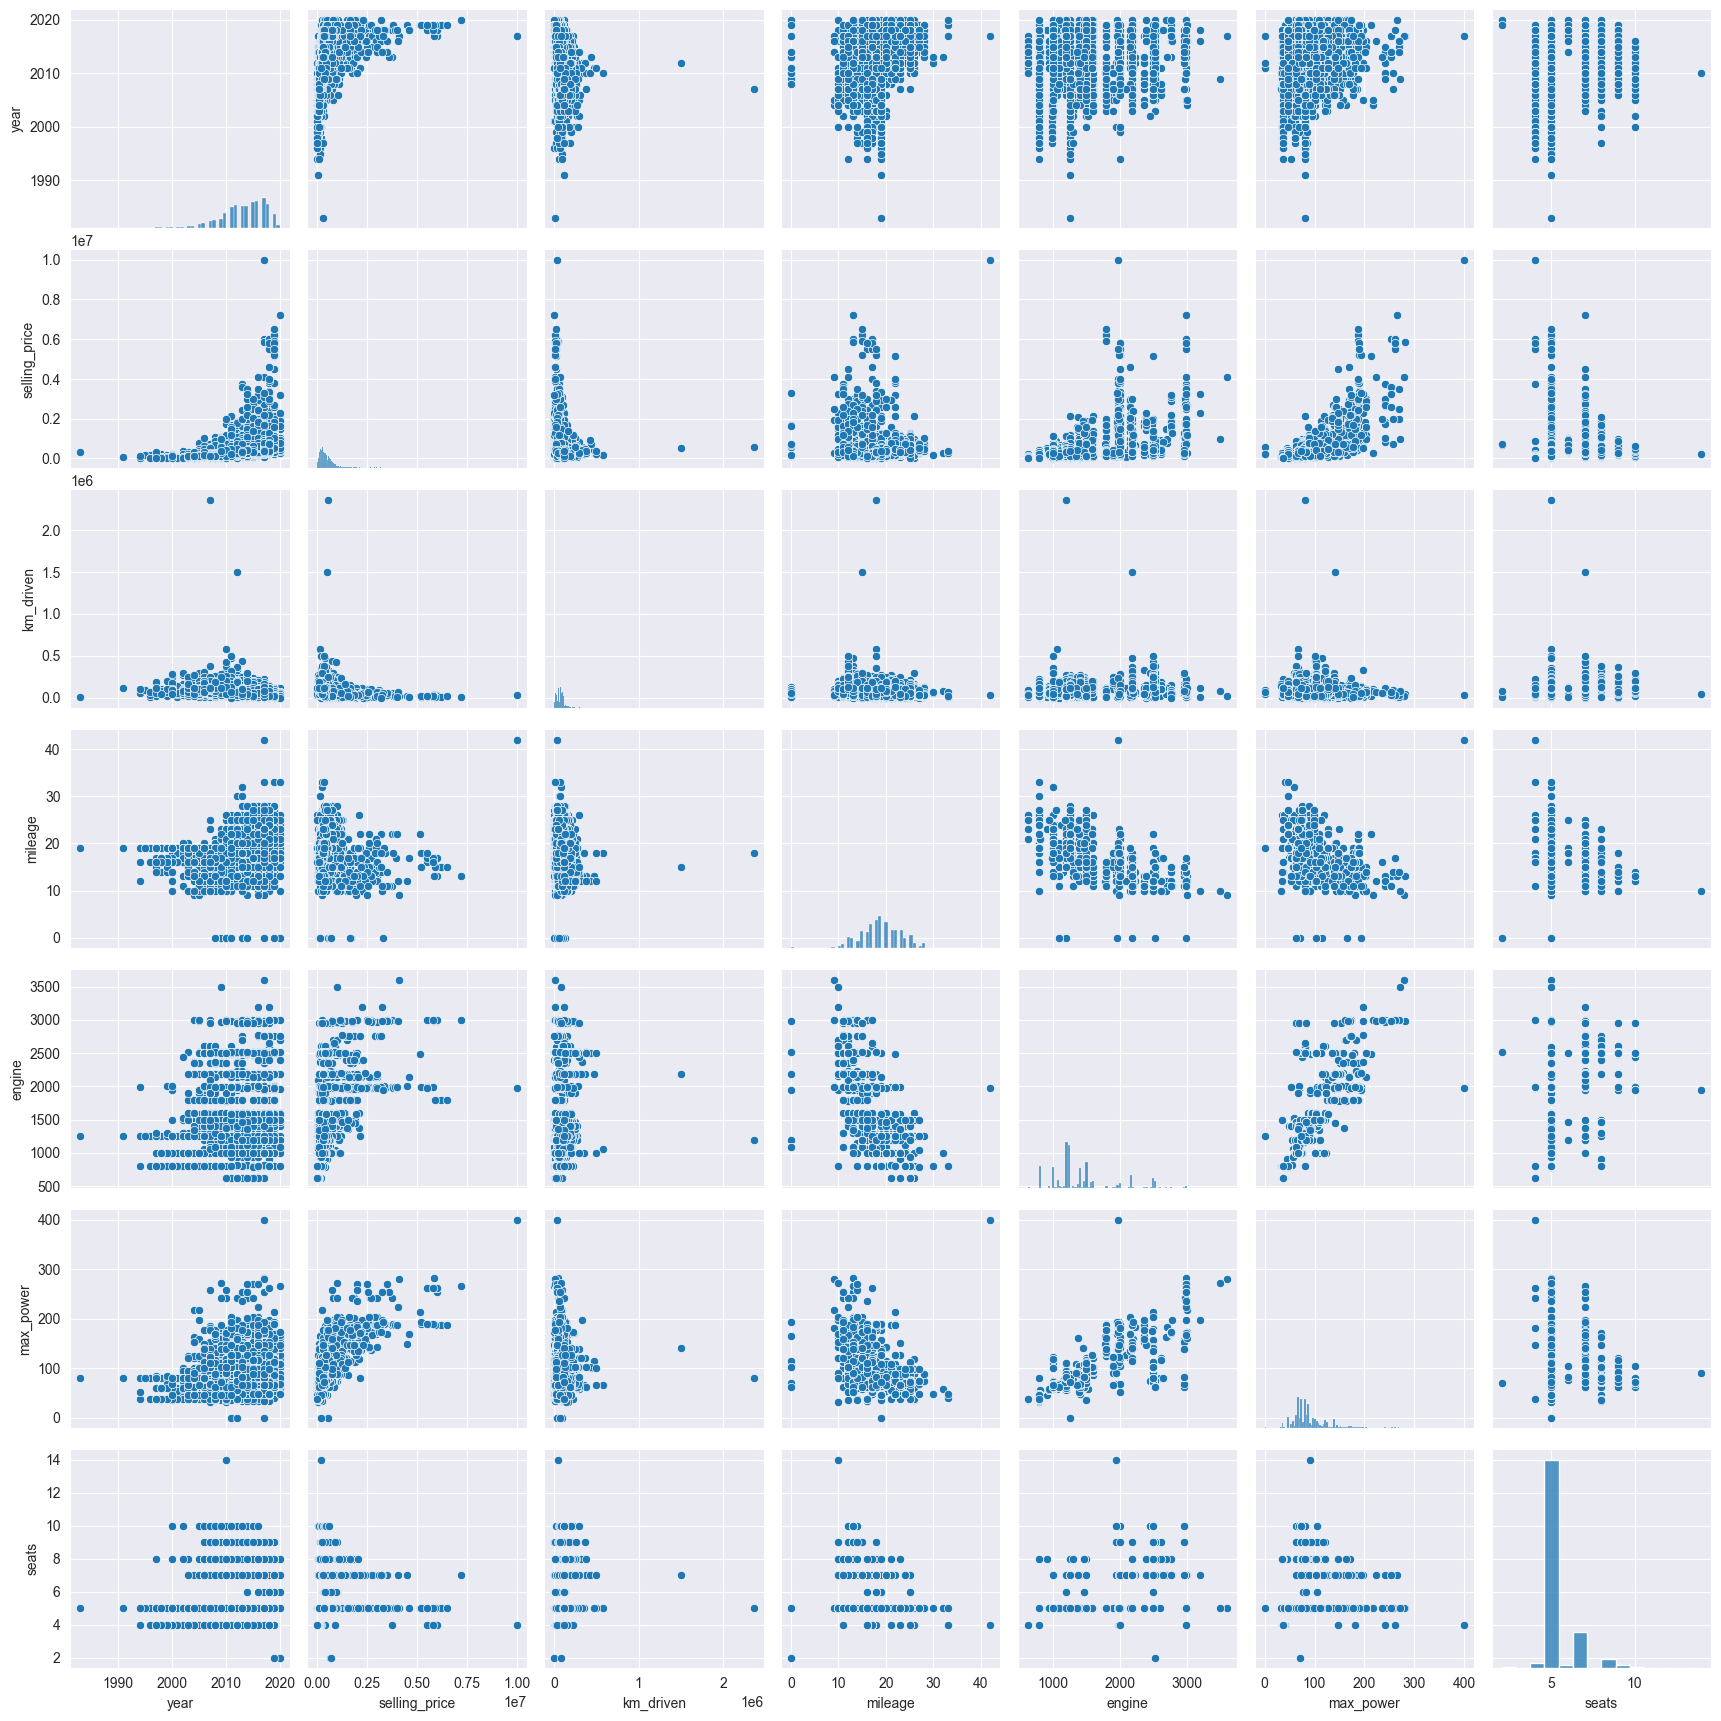

In [27]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df_train)

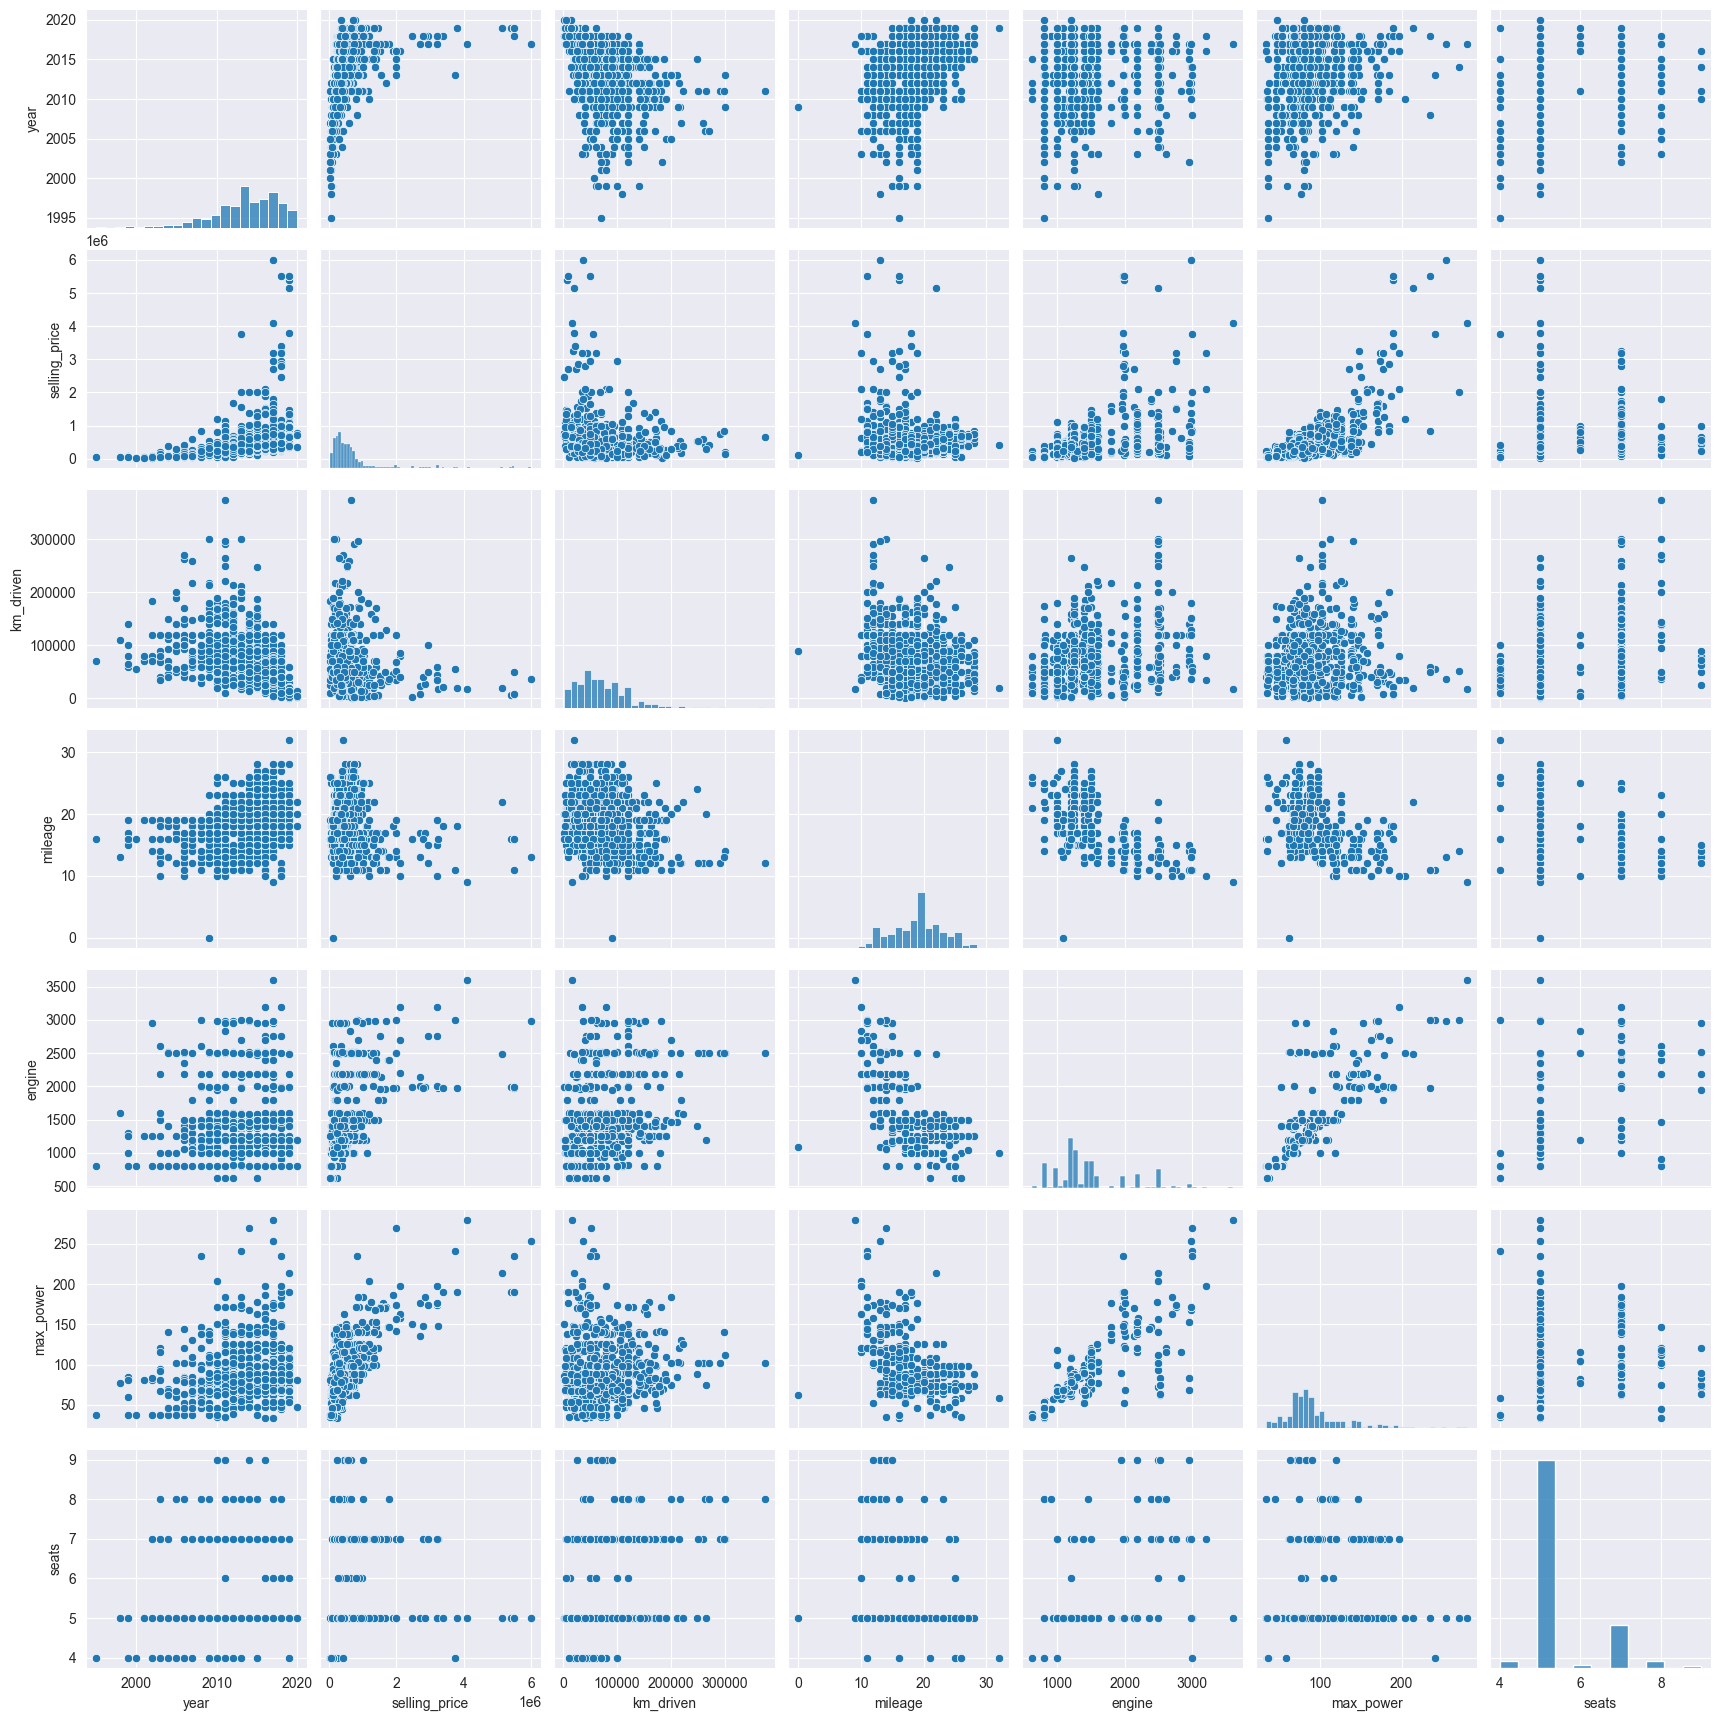

In [28]:
sns.pairplot(df_test)

## Выводы

В целом, оба графика схожи по распределению признаков

Для обоих датасетов выглядит так, что есть связь (схожесть диаграммы рассеяния) между следующими переменными:

Прямая:
- `max_power` - `selling_price`

Обратная:

- Пробег `km_driven` - `selling_price`
- Цена `year` - `selling_price`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [29]:
corr_map = df_train[num_features + ["selling_price"]].corr()
corr_map

,year,km_driven,mileage,engine,max_power,seats,selling_price
year,1.00,-0.37,0.34,0.00,0.16,0.04,0.43
km_driven,-0.37,1.00,-0.18,0.23,0.03,0.19,-0.16
mileage,0.34,-0.18,1.00,-0.57,-0.37,-0.46,-0.10
engine,0.00,0.23,-0.57,1.00,0.68,0.65,0.45
max_power,0.16,0.03,-0.37,0.68,1.00,0.25,0.69
seats,0.04,0.19,-0.46,0.65,0.25,1.00,0.15
selling_price,0.43,-0.16,-0.10,0.45,0.69,0.15,1.00


<Axes: >

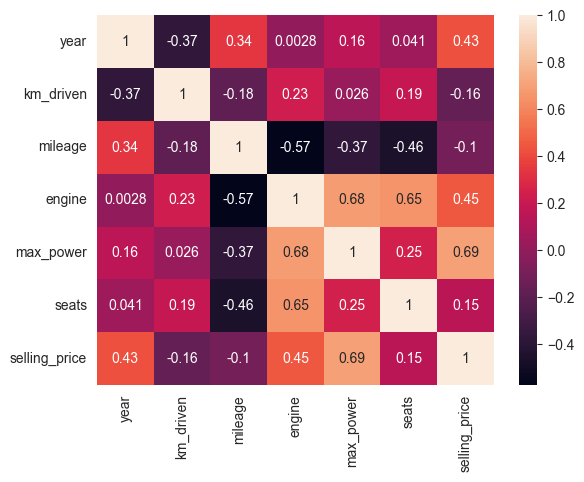

In [30]:
sns.heatmap(corr_map, annot=True)

In [31]:
# Получение корреляционных пар
# Функцию нагенерил Deepseek - вроде правильно

# Самый простой и эффективный способ
def get_corr_pairs_final(corr_map, sort_by="abs", ascending=False):
    corr_pairs = (
        corr_map.stack()
        .reset_index()
        .rename(
            columns={"level_0": "feature1", "level_1": "feature2", 0: "correlation"}
        )
    )

    # Убираем диагональ
    corr_pairs = corr_pairs[corr_pairs["feature1"] != corr_pairs["feature2"]]

    # Убираем дубликаты A-B / B-A
    corr_pairs["sorted_features"] = corr_pairs[["feature1", "feature2"]].apply(
        lambda x: "-".join(sorted([x["feature1"], x["feature2"]])), axis=1
    )
    corr_pairs = corr_pairs.drop_duplicates("sorted_features").drop(
        "sorted_features", axis=1
    )

    # Добавляем абсолютное значение и сортируем
    corr_pairs["abs_correlation"] = corr_pairs["correlation"].abs()

    if sort_by == "abs":
        corr_pairs = corr_pairs.sort_values("abs_correlation", ascending=ascending)
    else:
        corr_pairs = corr_pairs.sort_values("correlation", ascending=ascending)

    return corr_pairs.reset_index(drop=True)


# Самые сильные связи
get_corr_pairs_final(corr_map, sort_by="abs", ascending=False)

,feature1,feature2,correlation,abs_correlation
0,max_power,selling_price,0.69,0.69
1,engine,max_power,0.68,0.68
2,engine,seats,0.65,0.65
3,mileage,engine,-0.57,0.57
4,mileage,seats,-0.46,0.46
5,engine,selling_price,0.45,0.45
6,year,selling_price,0.43,0.43
7,year,km_driven,-0.37,0.37
8,mileage,max_power,-0.37,0.37
9,year,mileage,0.34,0.34


In [32]:
# Самые слабые связи
get_corr_pairs_final(corr_map, sort_by="abs", ascending=True)

,feature1,feature2,correlation,abs_correlation
0,year,engine,0.00,0.00
1,km_driven,max_power,0.03,0.03
2,year,seats,0.04,0.04
3,mileage,selling_price,-0.10,0.10
4,seats,selling_price,0.15,0.15
5,year,max_power,0.16,0.16
6,km_driven,selling_price,-0.16,0.16
7,km_driven,mileage,-0.18,0.18
8,km_driven,seats,0.19,0.19
9,km_driven,engine,0.23,0.23


### Резюме по связям

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?


#### Наименее скоррелированные:

year & engine (0)
km_driven &  max_power (0.03)

## Описание связей
Прямая:

- `max_power` (Мощность) и `selling_price` стоимость (0.69) - сильная
- `engine` (Объем двигателя) и `selling_price` стоимость (0.45)
- `year` (год) и `selling_price` (чем раньше была выпущена машина, тем меньше её цена) (0.43)
- `mileage` (потребление топлива) и `year` год (0.34)

Обратная:
- `km_driven` и `year` (-0.37) (чем раньше была выпущена машина, тем больше она проехала)
- `engine` и `mileage` (-0.57)
- `max_power` и `mileage` (-0.37) # Чем больше 
- `seats` и `mileage` (-0.37)

! Между годом и пробегом есть обратная корреляция (Чем раньше была выпущена машина, тем больше её пробег)
!! Важное замечание про `mileage`, чем больше это значение, тем экономичнее значение, потому что это км на литр, а не показатель кол-ва литров на километр


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [33]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [34]:
num_features

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [35]:
X_train, y_train = df_train[num_features], df_train["selling_price"]

In [36]:
assert X_train.shape == (5840, 6)

In [37]:
X_test, y_test = df_test[num_features], df_test["selling_price"]

In [38]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error as MSE,
    mean_absolute_percentage_error as MAPE,
    root_mean_squared_error as RMSE,
)


def get_coefs_for_features(
    features: list[str], coefs, sort_by: str = "coef"
) -> pd.DataFrame:
    """Функция для форматирования коэффициентов по заданому списку фичей"""
    data = []
    for feature, coef in zip(features, coefs):
        data.append((feature, coef))

    stat = pd.DataFrame(data=data, columns=["feature", "coef"])
    stat["abs_coef"] = stat["coef"].abs()
    return stat.sort_values(sort_by, ascending=False)


class Evaluator:
    """Класс для оценки модели и логирования результатов"""

    def __init__(self):
        self.predictions = {}
        self.metrics = {}

    def eval(self, y_test, y_pred, model_name) -> None:
        # решил немного расширить список метрики
        metrics = {
            "r2_score": r2_score(y_test, y_pred),
            "mse": MSE(y_test, y_pred),
            "rmse": RMSE(y_test, y_pred),
            "mape": MAPE(y_test, y_pred),
        }

        self.predictions[model_name] = np.copy(y_pred)
        self.metrics[model_name] = metrics

        print("R2 Score {:.4%}".format(metrics["r2_score"]))
        print("MSE Score {:.4f}".format(metrics["mse"]))
        print("RMSE Score {:.4f}".format(metrics["rmse"]))
        print("MAPE Score {:.4%}".format(metrics["mape"]))
        return metrics

    def get_results(self) -> pd.DataFrame:
        stat_df = pd.DataFrame.from_dict(evaluator.metrics, orient="index")
        stat_df.index.rename("model", inplace=True)
        return stat_df.reset_index()


evaluator = Evaluator()

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
evaluator.eval(y_test, y_pred, model_name="LinearRegression")

R2 Score 59.4781%
MSE Score 232931278633.7691
RMSE Score 482629.5460
MAPE Score 62.1296%


{'r2_score': 0.5947813024440662,
 'mse': 232931278633.76907,
 'rmse': 482629.545960221,
 'mape': 0.6212958956298991}

In [43]:
display(get_coefs_for_features(X_train.columns, lr.coef_))

print("Intercept:", lr.intercept_)

,feature,coef,abs_coef
0,year,37660.73,37660.73
4,max_power,10206.66,10206.66
2,mileage,6567.21,6567.21
3,engine,122.99,122.99
1,km_driven,-0.73,0.73
5,seats,-24246.51,24246.51


Intercept: -76313072.7475782


Качество среднее:

R2 - больше 0.5 (почти 0.6) - это значит, что мы смогли объяснить около 60% дисперсии значений

MSE, RMSE - большое, мы ошибаемся где-то на 500 тысяч в своих предсказаниях

MAPE - 62% на столько мы ошибаемся в предсказании цены

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
lr_scaled = LinearRegression()

# Fittings
lr_scaled.fit(X_train_scaled, y_train)
y_pred = lr_scaled.predict(X_test_scaled)

# Estimation
sc_lr_metrics = evaluator.eval(y_test, y_pred, model_name="LinearRegressionWithScaler")

R2 Score 56.5904%
MSE Score 249531003572.7875
RMSE Score 499530.7834
MAPE Score 59.4405%


### Выводы

R2 score и MSE существенно не изменились.
Оно и очевидно, Линейная регрессия просто поменяла коэффциенты учитывая масштаб признаков. Однако на масштабированных признаках мы можем оценить вклад каждого из них. См. ниже


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

- `max_power` (Мощность двигателя)

In [46]:
display(get_coefs_for_features(num_features, lr_scaled.coef_))

,feature,coef,abs_coef
4,max_power,322658.84,322658.84
0,year,154230.90,154230.90
3,engine,59728.38,59728.38
2,mileage,26307.48,26307.48
5,seats,-23816.37,23816.37
1,km_driven,-43882.97,43882.97


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.


## Lasso

Для Lasso и L1 регуляризации важная предобработка для минимизации штрафов, поэтому воспользуемся Standard Scaler

In [47]:
from sklearn.linear_model import Lasso

lasso_std = Lasso(random_state=42)

lasso_std.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [48]:
y_pred = lasso_std.predict(X_test_scaled)
evaluator.eval(y_test, y_pred, model_name="LassoStd")
get_coefs_for_features(num_features, lasso_std.coef_)

R2 Score 56.5902%
MSE Score 249531713878.1165
RMSE Score 499531.4944
MAPE Score 59.4402%


,feature,coef,abs_coef
4,max_power,322659.76,322659.76
0,year,154230.71,154230.71
3,engine,59723.53,59723.53
2,mileage,26305.60,26305.60
5,seats,-23813.50,23813.50
1,km_driven,-43881.85,43881.85


## Lasso без предобработки

А что если мы обучим Lasso без предобработки?

In [49]:
lasso = Lasso(random_state=42)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [50]:
evaluator.eval(y_test, y_pred, model_name="LassoWithoutScaler")
get_coefs_for_features(num_features, lasso.coef_)

R2 Score 59.4781%
MSE Score 232931438465.7033
RMSE Score 482629.7115
MAPE Score 62.1295%


,feature,coef,abs_coef
0,year,37660.59,37660.59
4,max_power,10206.69,10206.69
2,mileage,6567.24,6567.24
3,engine,122.99,122.99
1,km_driven,-0.73,0.73
5,seats,-24244.32,24244.32


### Резюме

Качество между Linear Regression по R2 не не отличается, оба дают около 56.6 % объясненной дисперсии


Интересно, что зануление произошло как раз при отсуствии предобработки, соотвественно, модель отработала штатно и выдала штраф признаку `seats`. По качеству Lasso на стандартизированных и не-стандартизированных фичах почти не отличаются


#### Попробуем применить другой Scaler - MinMaxScaler

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

lasso_min_max = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
        ("estimator", Lasso(random_state=42)),
    ]
)

lasso_min_max.fit(X_train, y_train)

y_pred = lasso_min_max.predict(X_test)
evaluator.eval(y_test, y_pred, model_name="LassoMinMaxScaler")
get_coefs_for_features(num_features, lasso_min_max["estimator"].coef_)

R2 Score 59.4762%
MSE Score 232942583427.5355
RMSE Score 482641.2575
MAPE Score 62.1286%


,feature,coef,abs_coef
4,max_power,4082668.92,4082668.92
0,year,1393583.13,1393583.13
3,engine,366253.12,366253.12
2,mileage,275586.66,275586.66
5,seats,-290704.82,290704.82
1,km_driven,-1722661.88,1722661.88


## Оценка качества:

Качество получилось сопоставимое (R2 и другие метрики идентичны), но у Lasso со StandardScaler чуть выше. Поэтому маркируем её как более лучшую (хотя кто знает, что нам покажет итог)

В случае работы с ненормализованными признаким - переменная `seats` занулилась, что очевидно, так как мы штрафуем часть признаков, если они не соответсвуют масштабу

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [х] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [х] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей? 50
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [52]:
from sklearn.base import BaseEstimator
from typing import Any


def cv(
    estimator: BaseEstimator,
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.DataFrame, np.ndarray],
    param_grid: dict[str, Any],
    k: Optional[int] = 10,
    scoring: str = "neg_mean_squared_error",
) -> BaseEstimator:
    grid_cv = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scoring,
        cv=k,
    )
    print("Fitting", str(estimator))
    print("Metric", scoring)
    grid_cv.fit(X, y)
    print("Best parameters set found on train set:", grid_cv.best_params_)
    grid_size = k
    for param_set in param_grid.values():
        grid_size *= len(param_set)
    print("Total models_num", grid_size)

    return grid_cv.best_estimator_

In [53]:
from sklearn.model_selection import GridSearchCV

CV_FOLDS = 10
alpha_params = np.logspace(-4, 0, 100)

lasso_cv = Lasso(random_state=42)

parameters = {
    "alpha": alpha_params,
}

lasso_cv = cv(
    lasso_cv,
    X_train_scaled,
    y_train,
    k=CV_FOLDS,
    param_grid=parameters,
)

Fitting Lasso(random_state=42)
Metric neg_mean_squared_error
Best parameters set found on train set: {'alpha': 1.0}
Total models_num 1000


In [54]:
y_pred = lasso_cv.predict(X_test_scaled)

evaluator.eval(y_test, y_pred, "LassoCV")
get_coefs_for_features(num_features, lasso_cv.coef_)

R2 Score 56.5902%
MSE Score 249531713878.1165
RMSE Score 499531.4944
MAPE Score 59.4402%


,feature,coef,abs_coef
4,max_power,322659.76,322659.76
0,year,154230.71,154230.71
3,engine,59723.53,59723.53
2,mileage,26305.60,26305.60
5,seats,-23813.50,23813.50
1,km_driven,-43881.85,43881.85


## Ответы на вопросы

- Всего было обучено 1000 моделей (CV_FOLDS x Num Params Val)
- GridSearch выбрал коэффициент в 1 для нашей регуляризации

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [55]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [56]:
# alpha_params переиспользуем
l1_ratio_params = np.arange(0.1, 1.1, 0.1)
tol_params = [1e-4, 1e-3, 1e-2]

parameters = {
    "alpha": alpha_params,
    "l1_ratio": l1_ratio_params,
    "tol": tol_params,
}

elastic = cv(
    elastic,
    X_train_scaled,
    y_train,
    param_grid=parameters,
    k=CV_FOLDS,
)

Fitting ElasticNet()
Metric neg_mean_squared_error
Best parameters set found on train set: {'alpha': 0.016681005372000592, 'l1_ratio': 0.2, 'tol': 0.01}
Total models_num 30000


In [57]:
y_pred = elastic.predict(X_test_scaled)
evaluator.eval(y_test, y_pred, model_name="ElasticNetCV")

R2 Score 56.2933%
MSE Score 251238492320.4382
RMSE Score 501236.9622
MAPE Score 58.5809%


{'r2_score': 0.5629331739767254,
 'mse': 251238492320.4382,
 'rmse': 501236.962244843,
 'mape': 0.5858088544478678}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


In [58]:
df_train_features = df_train[num_features + cat_features]
df_test_features = df_test[num_features + cat_features]

df_train_features.head()

,year,km_driven,mileage,engine,max_power,seats,name,fuel,seller_type,transmission,owner
0,2014,145500,23,1248,74,5,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,2014,120000,21,1498,103,5,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,2010,127000,23,1396,90,5,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
3,2007,120000,16,1298,88,5,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
4,2017,45000,20,1197,81,5,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert


Переменная бранд
В столбце name указана модель машины, мы очень легко и просто можем извлечь бренд производителя и модель (это первые 2 токена)

In [59]:
# Посмотрим на уникальных производителей и модели
brands = []
models = []
brand_models = []


def get_token_by_its_pos(text: str, pos: int) -> Optional[str]:
    splitted = text.split()
    if pos >= len(splitted):
        return None
    return splitted[pos]


for i, row in df_train.iterrows():
    name = row["name"]

    brand, model = get_token_by_its_pos(name, 0), get_token_by_its_pos(name, 1)
    brand_model = brand + "_" + model
    brands.append(brand)
    models.append(model)
    brand_models.append(brand_model)

from collections import Counter

brand_counter = Counter(brands)
model_counter = Counter(models)
brand_models_counter = Counter(brand_models)

print("Top 10 брендов")
print("Всего уникальных элементов", len(brand_counter))
display(brand_counter.most_common(10))
print("-" * 1)
print("Top 10 моделей")
print("Всего уникальных элементов", len(model_counter))
display(model_counter.most_common(10))
print("-" * 1)
print("Top 10 бренд х модели")
print("Всего уникальных элементов", len(brand_models_counter))
display(brand_models_counter.most_common(10))

Top 10 брендов
Всего уникальных элементов 30


[('Maruti', 1804),
 ('Hyundai', 1058),
 ('Mahindra', 611),
 ('Tata', 534),
 ('Toyota', 309),
 ('Ford', 308),
 ('Honda', 308),
 ('Chevrolet', 188),
 ('Renault', 171),
 ('Volkswagen', 153)]

-
Top 10 моделей
Всего уникальных элементов 202


[('Swift', 558),
 ('Alto', 316),
 ('i20', 247),
 ('Wagon', 205),
 ('Innova', 160),
 ('Bolero', 156),
 ('Verna', 149),
 ('City', 141),
 ('Figo', 135),
 ('Grand', 130)]

-
Top 10 бренд х модели
Всего уникальных элементов 205


[('Maruti_Swift', 558),
 ('Maruti_Alto', 316),
 ('Hyundai_i20', 247),
 ('Maruti_Wagon', 205),
 ('Toyota_Innova', 160),
 ('Mahindra_Bolero', 156),
 ('Hyundai_Verna', 149),
 ('Honda_City', 141),
 ('Ford_Figo', 135),
 ('Hyundai_Grand', 129)]

Число моделей в отдельности близко к числу комбинаций Модели х Бренд, это свидетельствует о том, что названия моделей слабо пересекаются у разных производителей.

2-мя путями:

1. Закодировать Производитель + модели, тогда мы получим 205 позиций и это приведет к формированию OHE матрицы на 204 колонки (фичи). Это не есть хорошо

2. Закодировать только бренд, тогда мы получим 30 фичей по производителям.

Первый путь приведет нас скорее всего к переобучению, поскольку у каждой модели есть её условная средняя рыночная цена.

В рамках второго пути мы получим то, что мы определим бренд машины и таким образом классифицируем её класс:
- Попадание Audi, BMW, Mercedes - премиальный сегмент
- Toyota, Volkswagen - средний ценовой сегмент
- Tata и остальное - бюджетный

In [60]:
class TokenExtractorTransformer(TransformerMixin):
    def __init__(
        self,
        source_col: str,
        target_col: str,
        token_pos: int = 1,
    ) -> None:
        self.src = source_col
        self.tgt = target_col
        self.pos = token_pos
        self.tokens = {"unknown"}
        self.is_fitted_ = False

    def fit(self, X, y=None) -> "TokenExtractorTransformer":
        for x in X[self.src].values:
            self.tokens.add(x.split()[self.pos])
        self.is_fitted_ = True
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        X[self.tgt] = X[self.src].apply(lambda x: self.extract_tokens(x))
        return X

    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, y).transform(X)

    def extract_tokens(self, text: Optional[str]) -> Union[np.nan, str]:
        toks = text.split()
        for token in toks:
            if token in self.tokens:
                return token
        return "unknown"

In [61]:
brand_transformer = TokenExtractorTransformer(
    source_col="name", target_col="brand", token_pos=0
)
brand_transformer.fit(df_train_features)
print("Brand tokens in transformer\n", brand_transformer.tokens)

model_transformer = TokenExtractorTransformer(
    source_col="name", target_col="model", token_pos=1
)
model_transformer.fit(df_train_features)
print("Model tokens in transformer\n", model_transformer.tokens)

Brand tokens in transformer
 {'Maruti', 'Peugeot', 'Honda', 'Toyota', 'Fiat', 'BMW', 'Mercedes-Benz', 'Force', 'Volvo', 'Mahindra', 'Hyundai', 'Ford', 'Renault', 'Datsun', 'Ambassador', 'Land', 'unknown', 'MG', 'Lexus', 'Volkswagen', 'Kia', 'Mitsubishi', 'Skoda', 'Chevrolet', 'Audi', 'Nissan', 'Daewoo', 'Isuzu', 'Tata', 'Jeep', 'Jaguar'}
Model tokens in transformer
 {'XC40', 'Q3', 'SX4', 'XUV500', 'Superb', 'Santro', '3', 'Camry', 'Vitara', 'Civic', 'NuvoSport', 'Scorpio', 'Scala', 'Yeti', 'XE', 'Getz', 'Wagon', 'Manza', 'Multivan', 'Q7', 'Tavera', 'CrossPolo', 'i10', 'Baleno', 'ES', 'XC90', 'Accord', 'GLA', 'Jetta', 'S60', 'D-Max', 'Bolero', 'Compass', 'Rover', 'Duster', 'Santa', 'Omni', 'Tucson', 'S-Presso', 'unknown', 'GL-Class', 'Enjoy', 'Glanza', 'B', 'A4', 'Beat', 'KWID', 'V40', 'Willys', 'Bolt', 'EcoSport', 'Venture', 'TUV', 'Eeco', 'Captiva', 'Aria', 'Punto', 'Aspire', 'Xcent', 'Cruze', 'Endeavour', 'Innova', 'Hector', 'Matiz', 'Indica', 'BRV', 'Micra', 'A-Star', 'Terrano', 'So

In [62]:
X_train_cat = brand_transformer.transform(df_train_features)
X_train_cat = model_transformer.transform(X_train_cat)


X_test_cat = brand_transformer.transform(df_test_features)
X_test_cat = model_transformer.transform(X_test_cat)

In [63]:
assert X_train_cat.shape == (5840, 13)  # скорректировал

In [64]:
X_train_cat.describe(include="object")

,name,fuel,seller_type,transmission,owner,brand,model
count,5840,5840,5840,5840,5840,5840,5840
unique,1924,4,3,2,5,30,190
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,Maruti,Swift
freq,91,3177,5223,5336,3603,1804,558


In [65]:
X_train_cat.head()

,year,km_driven,mileage,engine,max_power,seats,name,fuel,seller_type,transmission,owner,brand,model
0,2014,145500,23,1248,74,5,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,Maruti,Swift
1,2014,120000,21,1498,103,5,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,Skoda,Rapid
2,2010,127000,23,1396,90,5,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,Hyundai,i20
3,2007,120000,16,1298,88,5,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,Maruti,Swift
4,2017,45000,20,1197,81,5,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner,Hyundai,Xcent


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

Здесь есть нюанс, так как мы обучаемся только на train, то нам могут в test встретиться модели, которых у нас нет в трейн

Поэтому мы будем занулять неизвестные нам категории... Но это тоже не супер правильно, так как нули тоже представляют собой какую-то модель.

Ну что ж, примем это допущение и обучим модель

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]
num_cols = ["year", "km_driven", "mileage", "engine", "max_power"]

# Ладно, можно и его использовать
col_transformer_base = ColumnTransformer(
    transformers=[
        (
            "ohe",
            OneHotEncoder(
                drop="first",
                sparse_output=False,
                handle_unknown="infrequent_if_exist",
            ),
            ohe_cols,
        ),
        ("scaler", StandardScaler(), num_cols),
    ]
)

X_train_cat_without_name = col_transformer_base.fit_transform(X_train_cat)
X_test_cat_without_name = col_transformer_base.transform(X_test_cat)

print("Train", X_train_cat_without_name.shape)
print("Test", X_test_cat_without_name.shape)

Train (5840, 23)
Test (1000, 23)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Качество модели не улучшилось судя по метрикам ниже

## Обучение Ridge без фичи name

In [67]:
from sklearn.linear_model import Ridge

ridge_cat = Ridge(random_state=42)

CV_FOLDS = 10

parameters = {
    "alpha": alpha_params,
    "tol": tol_params,
}

ridge_cat = cv(
    ridge_cat,
    X_train_cat_without_name,
    y_train,
    param_grid=parameters,
    k=CV_FOLDS,
    scoring="r2",
)

Fitting Ridge(random_state=42)
Metric r2
Best parameters set found on train set: {'alpha': 1.0, 'tol': 0.0001}
Total models_num 3000


In [68]:
get_coefs_for_features(X_train_cat_without_name, ridge_cat.coef_, sort_by="abs_coef")

,feature,coef,abs_coef
8,ohe__owner_Test Drive Car,2636553.23,2636553.23
10,ohe__seats_4,495056.71,495056.71
5,ohe__transmission_Manual,-286388.17,286388.17
22,scaler__max_power,283690.63,283690.63
12,ohe__seats_6,-176343.41,176343.41
1,ohe__fuel_LPG,156685.70,156685.70
18,scaler__year,150929.36,150929.36
17,ohe__seats_14,-129117.59,129117.59
4,ohe__seller_type_Trustmark Dealer,-121351.10,121351.10
3,ohe__seller_type_Individual,-105208.95,105208.95


In [69]:
y_pred = ridge_cat.predict(X_test_cat_without_name)

ridge_best_metrics = evaluator.eval(y_test, y_pred, "RidgeCatCV")

R2 Score 63.3762%
MSE Score 210524107499.0674
RMSE Score 458829.0613
MAPE Score 56.1326%


Качество улучшилось.

Все целевые метрики улучшиились:

- R2 - теперь мы объясняем 63%
- MSE - уменьшилось (это хорошо)
- MAPE - теперь наша средняя ошибка - 56% против 60+ ранее. Это тоже хорошо

Топ 5 фичей с самым большим влиянием:
- ohe__owner_Test Drive Car
- ohe__seats_4
- ohe__transmission_Manual
- scaler__max_power
- ohe__seats_6



# Обучение с фичей Производитель

Для категориальных фичей используем тот же подход, что из предыдущего задания, однако для фичи производителя мы предлагаем не брать стратегию дропа 1-го значения.

В проде нам нужно будет занулять эту фичу, когда мы будем встречать неизвестную модель


In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ладно, можно и его использовать
transformer_brand = ColumnTransformer(
    transformers=[
        (
            "ohe",
            OneHotEncoder(
                drop="first",
                sparse_output=False,
                handle_unknown="infrequent_if_exist",
            ),
            ohe_cols,
        ),
        (
            "ohe_brand",
            OneHotEncoder(
                sparse_output=False,
                handle_unknown="infrequent_if_exist",
            ),
            ["brand"],
        ),
        ("scaler", StandardScaler(), num_cols),
    ]
)

X_train_cat_brand = transformer_brand.fit_transform(X_train_cat)
X_test_cat_brand = transformer_brand.transform(X_test_cat)

print("Train", X_train_cat_brand.shape)
print("Test", X_test_cat_brand.shape)

Train (5840, 53)
Test (1000, 53)


In [71]:
from sklearn.linear_model import Ridge

ridge_brand = Ridge(random_state=42)

CV_FOLDS = 10

parameters = {
    "alpha": alpha_params,
    "tol": tol_params,
}

ridge_brand = cv(
    ridge_brand,
    X_train_cat_brand,
    y_train,
    param_grid=parameters,
    k=CV_FOLDS,
    scoring="r2",
)

Fitting Ridge(random_state=42)
Metric r2
Best parameters set found on train set: {'alpha': 1.0, 'tol': 0.0001}
Total models_num 3000


In [72]:
get_coefs_for_features(X_train_cat_brand, ridge_brand.coef_, sort_by="abs_coef")

,feature,coef,abs_coef
8,ohe__owner_Test Drive Car,2520034.56,2520034.56
47,ohe_brand__brand_Volvo,1633272.35,1633272.35
34,ohe_brand__brand_Lexus,1500771.67,1500771.67
20,ohe_brand__brand_BMW,973461.14,973461.14
33,ohe_brand__brand_Land,875224.19,875224.19
30,ohe_brand__brand_Jaguar,637111.63,637111.63
38,ohe_brand__brand_Mercedes-Benz,591324.77,591324.77
44,ohe_brand__brand_Tata,-547443.49,547443.49
23,ohe_brand__brand_Datsun,-545865.55,545865.55
21,ohe_brand__brand_Chevrolet,-520110.31,520110.31


In [73]:
y_pred = ridge_brand.predict(X_test_cat_brand)

evaluator.eval(y_test, y_pred, "RidgeCatCVWithBrand")

R2 Score 78.0766%
MSE Score 126022193552.7846
RMSE Score 354996.0472
MAPE Score 43.7167%


{'r2_score': 0.780765599905148,
 'mse': 126022193552.78459,
 'rmse': 354996.04723543697,
 'mape': 0.4371669448154816}

Качество существенно улучшилось.

Все целевые метрики улучшиились:

- R2 - теперь мы объясняем 78%
- MSE - уменьшилось (это хорошо)
- MAPE - теперь наша средняя ошибка - 43% против 60+ ранее


Топ 5 фичей с самым большим влиянием:

- ohe__owner_Test Drive Car
- ohe_brand__brand_Volvo
- ohe_brand__brand_Lexus
- ohe_brand__brand_BMW
- ohe_brand__brand_Land


### Обучение Ridge на производителях + моделях

Тот же самый подход, что и на модели Ridge для производителей только с ещё одной колонко - модель.

In [74]:
transformer_model = ColumnTransformer(
    transformers=[
        (
            "ohe",
            OneHotEncoder(
                drop="first",
                sparse_output=False,
                handle_unknown="infrequent_if_exist",
            ),
            ohe_cols,
        ),
        (
            "ohe_brand",
            OneHotEncoder(
                sparse_output=False,
                handle_unknown="infrequent_if_exist",
            ),
            ["brand", "model"],
        ),
        ("scaler", StandardScaler(), num_cols),
    ]
)

X_train_model_sc = transformer_model.fit_transform(X_train_cat)
X_test_model_sc = transformer_model.transform(X_test_cat)

print("Train", X_train_model_sc.shape)
print("Test", X_test_model_sc.shape)

Train (5840, 243)
Test (1000, 243)


In [75]:
from sklearn.model_selection import GridSearchCV

CV_FOLDS = 10

ridge_models = Ridge(random_state=42)

parameters = {
    "alpha": alpha_params,
    "tol": tol_params,
}

ridge_models = cv(
    ridge_models,
    X_train_model_sc,
    y_train,
    param_grid=parameters,
    k=CV_FOLDS,
    scoring="r2",
)

Fitting Ridge(random_state=42)
Metric r2
Best parameters set found on train set: {'alpha': 0.2718588242732943, 'tol': 0.0001}
Total models_num 3000


In [76]:
get_coefs_for_features(
    list(X_train_model_sc.columns), ridge_models.coef_, sort_by="abs_coef"
)

,feature,coef,abs_coef
223,ohe_brand__model_XC90,3743865.69,3743865.69
176,ohe_brand__model_S-Class,2781645.63,2781645.63
8,ohe__owner_Test Drive Car,2640645.66,2640645.66
221,ohe_brand__model_X7,2613004.91,2613004.91
219,ohe_brand__model_X4,2105102.94,2105102.94
...,...,...,...
204,ohe_brand__model_Trailblazer,7519.61,7519.61
200,ohe_brand__model_Terrano,-6501.23,6501.23
14,ohe__seats_8,-4500.93,4500.93
102,ohe_brand__model_Estate,-2924.75,2924.75


In [77]:
y_pred = ridge_models.predict(X_test_model_sc)

evaluator.eval(y_test, y_pred, "RidgeCatCVWithModels")

R2 Score 91.2671%
MSE Score 50199194432.7588
RMSE Score 224051.7673
MAPE Score 33.1368%


{'r2_score': 0.9126710147915249,
 'mse': 50199194432.758835,
 'rmse': 224051.76730559132,
 'mape': 0.3313680467250371}

В данной модели мы получили очень существенное улучшение качества по всем метрикам. R2 - 91%, mape - 33%

Топ 5 фичей с самым большим влиянием:

- ohe_brand__model_XC90
- ohe_brand__model_S-Class
- ohe__owner_Test Drive Car
- ohe_brand__model_X7
- ohe_brand__model_X4






## Резюме по моделям Ridge обученных на категориальных фичах 


### Ridge на категориях

Мы получили улучшение качество до 62% $R^2$ и снижение MAPE (56%). Для данной модели в топе оказались категориальные коэффициенты, а также мощность двигателя

### Ridge на производителях

R2 - 78%, mape - 43%

Модель достаточно хорошо должна хороша себя пока и количество фичей остается умеренным - 53

### Ridge на моделях авто

Мы молучили прирост в качестве до 91% (+13%), mape уменьшилось до 33%

У модели достаточно большой пул фичей - 200+


### Рефлексия

Модель на категориальных фичах по факту показала единственный существенный прирост качества от самой базовой модели + 8% по R2. Тем не менее, у неё все ещё высокие показатели ошибки.

Модель на производителях дала существенный прирост качества до 78%, мапе снизилось до 43%. В то же время, остался умеренный пул фичей - 53

Для Гребневой регрессии на моделях и производителях мы получили очень хорошее качество (91 R2 и 33% MAPE), однако существенно увеличился список фичей - 243 (почти в 5 раз по сравнению с моделью на производителях)


Мы получили переобучение и модель - "эксперта", которая может по модели машин предсказать её среднюю стоимость. Если она не знает, что это за машина - с высокой долей вероятности будем сваливаться в ошибку. 90% - наверное мечта, которая и должна остаться мечтой 


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [78]:
def business_metric(y_true, y_pred, tolerance: float = 0.1):
    # Считаем отклонение от реальной цены в абсолютных значениях
    relative_errors = np.abs((y_true - y_pred) / y_true)
    # По маске считаем долю
    within_tolerance = np.mean(relative_errors <= tolerance)

    return within_tolerance

In [79]:
def calculate_business_metrics(
    predictions: dict[str, dict[str, float]], thr: float = 0.1
):
    business_results = []

    for model, predicted in predictions.items():
        measure = business_metric(y_test, predicted, thr)
        business_results.append((model, measure))

    return pd.DataFrame(
        data=business_results, columns=["model", f"positive_{int(thr * 100)}"]
    )


# Добавим игру с бизнес-метрикой, чтобы оценить наши предсказания

ten = calculate_business_metrics(evaluator.predictions, 0.1)
twenty = calculate_business_metrics(evaluator.predictions, 0.2)
thirty = calculate_business_metrics(evaluator.predictions, 0.3)

In [80]:
# Метрики по всем моделям
statistics = evaluator.get_results()

for biz in (ten, twenty, thirty):
    statistics = statistics.merge(biz, on="model")

statistics.sort_values(by="positive_10", ascending=False)

,model,r2_score,mse,rmse,mape,positive_10,positive_20,positive_30
8,RidgeCatCVWithModels,0.91,50199194432.76,224051.77,0.33,0.35,0.58,0.72
7,RidgeCatCVWithBrand,0.78,126022193552.78,354996.05,0.44,0.30,0.49,0.64
6,RidgeCatCV,0.63,210524107499.07,458829.06,0.56,0.25,0.42,0.55
5,ElasticNetCV,0.56,251238492320.44,501236.96,0.59,0.24,0.45,0.57
0,LinearRegressionWithScaler,0.57,249531003572.79,499530.78,0.59,0.24,0.45,0.57
1,LassoStd,0.57,249531713878.12,499531.49,0.59,0.24,0.45,0.57
4,LassoCV,0.57,249531713878.12,499531.49,0.59,0.24,0.45,0.57
2,LassoWithoutScaler,0.59,232931438465.70,482629.71,0.62,0.22,0.42,0.55
3,LassoMinMaxScaler,0.59,232942583427.54,482641.26,0.62,0.22,0.42,0.55


In [88]:
print(statistics.sort_values(by="positive_10", ascending=False).to_markdown())

|    | model                      |   r2_score |         mse |   rmse |     mape |   positive_10 |   positive_20 |   positive_30 |
|---:|:---------------------------|-----------:|------------:|-------:|---------:|--------------:|--------------:|--------------:|
|  8 | RidgeCatCVWithModels       |   0.912671 | 5.01992e+10 | 224052 | 0.331368 |         0.355 |         0.579 |         0.718 |
|  7 | RidgeCatCVWithBrand        |   0.780766 | 1.26022e+11 | 354996 | 0.437167 |         0.305 |         0.493 |         0.643 |
|  6 | RidgeCatCV                 |   0.633762 | 2.10524e+11 | 458829 | 0.561326 |         0.247 |         0.417 |         0.547 |
|  5 | ElasticNetCV               |   0.562933 | 2.51238e+11 | 501237 | 0.585809 |         0.244 |         0.449 |         0.57  |
|  0 | LinearRegressionWithScaler |   0.565904 | 2.49531e+11 | 499531 | 0.594405 |         0.24  |         0.445 |         0.567 |
|  1 | LassoStd                   |   0.565902 | 2.49532e+11 | 499531 | 0.594402 | 

## Резюме по обучению

В топе - модель обученная на моделях автомобилей. Как писалось выше - эта модель "эксперт". Её высокие показатели объясняются тем, что она "знает" средние цены для каждой модели:
- Самая высокая бизнес-метрика - 33%
- Самое высокое R2 - 91%
- Самое низкое `rmse` - 234968.14 (в среднем мы ошибаемся на 350 тысяч)
- Самое низкое `mape` -  34% (в среднем наша оценка дает ошибку не более, чем в 44% по модулю)


У другой обученной модели (Ridge на категориальных фичах с брендом производителя) оказалось:
 - Наилучшее качество по бизнес метрикам - 30% успешных попаданий в диапазон +-10%)
- Самое высокое R2 - 78%
- Самое низкое `rmse` - 354968.14 (в среднем мы ошибаемся на 350 тысяч)
- Самое низкое `mape` -  44% (в среднем наша оценка дает ошибку не более, чем в 44% по модулю)


## Размышления

Для улучшения нашего подхода можно было бы попробовать другие подходы:

- Построение более обширного списка категориальных фичей - добавить к брендам также класс машины, 
- Внедрить механизм look-a-like SKU (аналогов). Мы бы на них смогли строить агрегаты по средним/медианным ценам и другим фичам. И обучаться на них. (В работе такое применяем)


Выбор финальной модели:

Несмотря на то, что Ridge по моделям - сомнительная, она лучше всего покрывает метрики бизнеса, а также может служить неплохим бейзлайном.

Также можно было красиво выйти из ситуации внедрением в обучение анонимных моделей со средними ценами, чтобы модель усвоила этот паттерн в своих весах. Однако это оверкил для данного ДЗ :) 

Так как нам недоступны другие модели (SOTA бустинги и случайные леса), то я останавливаю свой выбор на этой модели


# Сохранение результатов

Чтобы наша модель была самодостаточна в своих начинаниях нам нужно упаковать её в готовый пайплайн, где мы добавили работу с признакми и предобработкой данных

In [82]:
from sklearn.pipeline import Pipeline

model = Pipeline(
    steps=[
        ("median_tf", preprocessor),
        ("brand_extractor", brand_transformer),
        ("model_extractor", model_transformer),
        ("transformer", transformer_model),
        ("estimator", ridge_models),
    ]
)
model

,steps,"[('median_tf', ...), ('brand_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...), ('ohe_brand', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Test

In [84]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

print(model)

Pipeline(steps=[('median_tf',
                 <__main__.MyStateFullFillerTransformer object at 0x134f29cd0>),
                ('brand_extractor',
                 <__main__.TokenExtractorTransformer object at 0x134f398e0>),
                ('model_extractor',
                 <__main__.TokenExtractorTransformer object at 0x134f26030>),
                ('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'seats']),
                                                 ('ohe_brand',
                               

In [87]:
test_data = df_test.copy(deep=True)
y_pred = model.predict(test_data)
evaluator.eval(y_test, y_pred, "FinalModel")
evaluator.metrics["FinalModel"] == evaluator.metrics["RidgeCatCVWithModels"]

R2 Score 91.2671%
MSE Score 50199194432.7588
RMSE Score 224051.7673
MAPE Score 33.1368%


True

In [101]:
# Вспомогательные структуры данных
import json

feature_annotations = {}

for col in ohe_cols:
    feature_annotations[col] = list(X_train_cat[col].unique())


feature_annotations["seats"] = [int(s) for s in feature_annotations["seats"]]
feature_annotations["name"] = list(
    set((X_train_cat["brand"] + " " + X_train_cat["model"]).values)
)


with open("cat_features.json", "w") as f:
    json.dump(feature_annotations, f, ensure_ascii=False)

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
